In [1]:
import pandas as pd
import numpy as np
import pickle
from google.colab import drive
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, train_test_split
from sklearn import svm
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, roc_curve
import numpy as np

In [2]:
drive.mount('/drive')
uploaded = '/drive/My Drive/CS286/cs286_project_lung cancer/processed_data.pkl'

Mounted at /drive


In [3]:
with open(uploaded, 'rb') as f:
    loaded_dict = pickle.load(f)

print(loaded_dict.keys())
print(loaded_dict['copy_number_matrix'].shape, '\n', loaded_dict['copy_number_matrix'])
# print(len(loaded_dict['labels']), '\n', loaded_dict['labels'])
# print(len(loaded_dict['patient_ids']), '\n', loaded_dict['patient_ids'])
# print(len(loaded_dict['gene_ids']),'\n', loaded_dict['gene_ids'])

dict_keys(['copy_number_matrix', 'patient_ids', 'labels', 'gene_ids'])
(1058, 60623) 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [4]:
X_copy_number = loaded_dict['copy_number_matrix']
y_label = loaded_dict['labels']
# y_label = np.asarray(y_label).reshape((-1,1))
gene_ids = loaded_dict['gene_ids']
# print(X_copy_number)

In [ ]:
# training 80%, tesing 20%
X_train, X_test, y_train, y_test = train_test_split(X_copy_number, 
                                                    y_label, 
                                                    test_size = 0.20, 
                                                    random_state=40)

print(X_train.shape, X_test.shape)

(846, 60623) (212, 60623)


In [ ]:
import collections
print(collections.Counter(y_test))

Counter({1: 107, 0: 105})


In [ ]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
predictions = logisticRegr.predict(X_test)
score = logisticRegr.score(X_test, y_test)
print('Accuracy:', score)

0.9245283018867925


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
predictions = logisticRegr.predict(X_test)
score = logisticRegr.score(X_test, y_test)
print(score)

0.9245283018867925


In [ ]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[ 96   9]
 [  7 100]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))
print('Accuracy:', "{:.1%}".format(score))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       105
           1       0.92      0.93      0.93       107

    accuracy                           0.92       212
   macro avg       0.92      0.92      0.92       212
weighted avg       0.92      0.92      0.92       212

Accuracy: 92.5%


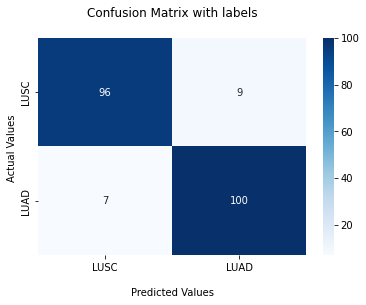

In [ ]:
import seaborn as sns

ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

ax.set_title('Confusion Matrix with labels\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['LUSC','LUAD'])
ax.yaxis.set_ticklabels(['LUSC','LUAD'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve

#Generate a no skill prediction
ns_prob = [0 for _ in range(len(y_test))]
ns_fpr, ns_tpr, threshold = roc_curve(y_test, ns_prob)

#Predict probabilities
probs = logisticRegr.predict_proba(X_test)
probs = probs[:, 1]
#print(probs)
lr_auc = roc_auc_score(y_test, probs)
print("ROC AUC for Logistic Regression:", round(lr_auc, 4))

#Calculate thr ROC Curve
fpr, tpr, threshold = roc_curve(y_test, probs)
#print(len(fpr), len(tpr), threshold)

#Calculate the PR-curve
#pr_no_skill = len(y_test[y_test == 1]) / len(y_test)
prec, recall, _ = precision_recall_curve(y_test, probs)

ROC AUC for Logistic Regression: 0.9667


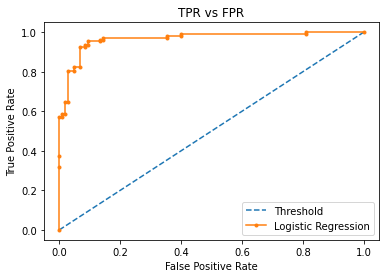

In [ ]:
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Threshold')
plt.plot(fpr, tpr, marker='.', label='Logistic Regression')
plt.title('TPR vs FPR')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

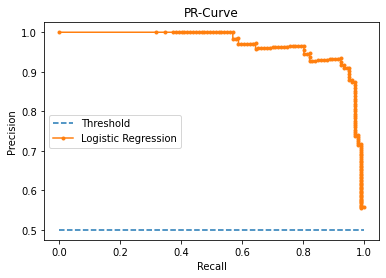

In [ ]:
#Show the PR plots 
plt.plot([0, 1], [0.5, 0.5], linestyle='--', label='Threshold')
plt.plot(recall, prec, marker='.', label='Logistic Regression')
plt.title('PR-Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()